<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/imdb_single_layer_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the imdb dataset with subwords tokenzer

In [1]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteFACJ99/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteFACJ99/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteFACJ99/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


## Split dataset

In [18]:
train_data, test_data = imdb['train'], imdb['test']

## take the tokenizer

In [4]:
tokenizer = info.features['text'].encoder

## Check the `encode` and `decode` method of tokenizer

In [9]:
sample_string = 'Deep learning is part of a broader family \n of machine learning methods based on artificial \n neural networks with representation learning.'

In [10]:
tokenized_string = tokenizer.encode(sample_string)
print('tokenized string is: {}'.format(tokenized_string))

tokenized string is: [6431, 364, 5635, 34, 9, 261, 6, 4, 3664, 125, 986, 7961, 7939, 7961, 6, 2805, 7961, 5635, 34, 7649, 8, 659, 25, 4132, 5543, 375, 7961, 7939, 7961, 442, 3809, 7961, 1632, 815, 22, 2003, 452, 5635, 100, 7975]


In [12]:
original_string = tokenizer.decode(tokenized_string)
print('original string is:\n {}'.format(original_string))

original string is:
 Deep learning is part of a broader family 
 of machine learning methods based on artificial 
 neural networks with representation learning.


## Let's check each token in `tokenized_string`

In [13]:
for ts in tokenized_string:
  print('{}--->{}'.format(ts, tokenizer.decode([ts])))

6431--->Dee
364--->p 
5635--->learn
34--->ing 
9--->is 
261--->part 
6--->of 
4--->a 
3664--->broad
125--->er 
986--->family
7961---> 
7939--->

7961---> 
6--->of 
2805--->machine
7961---> 
5635--->learn
34--->ing 
7649--->method
8--->s 
659--->based 
25--->on 
4132--->arti
5543--->fici
375--->al
7961---> 
7939--->

7961---> 
442--->ne
3809--->ural
7961---> 
1632--->net
815--->works 
22--->with 
2003--->represent
452--->ation 
5635--->learn
100--->ing
7975--->.


As it can be seen, the subwords tokenization is case sensitive and punctuation is maintained.

## Use the following methods to prepare `train_dataset` and `test_dataset` for the model:

1.    `shuffle(buffer_size)`

2.    `padded_batch(
    batch_size, padded_shapes=None, padding_values=None, drop_remainder=False)`
3.     To get the output shapes for elements of the input dataset/iterator: `tf.compat.v1.data.get_output_shapes(dataset_or_iterator)`

In [22]:
import tensorflow as tf

train_dataset = train_data.shuffle(10000)
train_dataset = train_dataset.padded_batch(batch_size=64, padded_shapes=tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(batch_size=64, padded_shapes=tf.compat.v1.data.get_output_shapes(test_data))

## Define the model with single layer LSTM


In [25]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset, verbose=2)

Epoch 1/10
391/391 - 88s - loss: 0.5116 - accuracy: 0.7488 - val_loss: 0.5598 - val_accuracy: 0.7135
Epoch 2/10
391/391 - 81s - loss: 0.3704 - accuracy: 0.8474 - val_loss: 0.4455 - val_accuracy: 0.8031
Epoch 3/10
391/391 - 82s - loss: 0.3413 - accuracy: 0.8580 - val_loss: 0.4247 - val_accuracy: 0.8304
Epoch 4/10
391/391 - 83s - loss: 0.5621 - accuracy: 0.7270 - val_loss: 0.8420 - val_accuracy: 0.6392
Epoch 5/10
391/391 - 83s - loss: 0.6331 - accuracy: 0.6582 - val_loss: 0.6176 - val_accuracy: 0.6612
Epoch 6/10
391/391 - 83s - loss: 0.4821 - accuracy: 0.7745 - val_loss: 0.4717 - val_accuracy: 0.7998
Epoch 7/10
391/391 - 82s - loss: 0.6036 - accuracy: 0.6822 - val_loss: 0.5724 - val_accuracy: 0.7118
Epoch 8/10
391/391 - 82s - loss: 0.4423 - accuracy: 0.8098 - val_loss: 0.4813 - val_accuracy: 0.7985
Epoch 9/10
391/391 - 83s - loss: 0.3464 - accuracy: 0.8599 - val_loss: 0.5590 - val_accuracy: 0.7107
Epoch 10/10
391/391 - 83s - loss: 0.2883 - accuracy: 0.8871 - val_loss: 0.4023 - val_accura

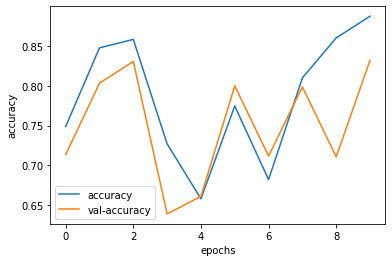

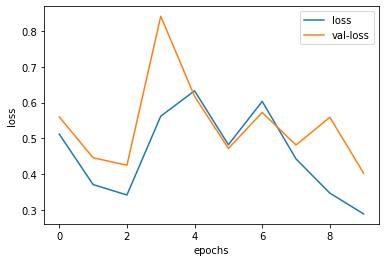

In [31]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string, 'val-'+string])
  plt.show()


plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')